In [2]:
# Project Report : Sentiment Analysis of Twitter Data Using Advanced Machine Learning Techniques



### **Phase 1: Business Understanding**

### Executive Summary

This phase of the project report delineates the foundational objectives, challenges, and strategies for developing a sophisticated machine learning model to perform sentiment analysis on Twitter data. The aim is to accurately classify tweets into negative, neutral, or positive sentiments, providing valuable insights for businesses and researchers into public opinion on diverse topics.

### 1. Project Objectives

- **Primary Objective:**
    - To create a high-accuracy machine learning model for classifying the sentiment of Twitter data.
- **Secondary Objectives:**
    - To harness sentiment analysis for extracting public opinion trends.
    - To equip businesses with tools for analyzing customer feedback on social media platforms.
    - To assist researchers in studying social trends and public opinions using Twitter data.

### 2. Business Questions and Problem Framing

- **Key Questions:**
    - How can sentiment analysis on Twitter provide actionable insights into public opinion trends?
    - What benefits can businesses and researchers derive from an accurate analysis of social media sentiments?
- **Problem Statement:**
    - The challenge lies in processing and analyzing voluminous Twitter data to classify sentiments accurately, considering the dynamic and nuanced nature of natural language on social media.

### 3. Success Criteria and Evaluation Metrics

- **Model Performance Metrics:**
    - Target high accuracy, precision, recall, F1-score, and AUC-ROC in model performance.
    - Focus on achieving model robustness and generalizability to various tweet types.
- **Business Impact Metrics:**
    - Evaluate the model's effectiveness in providing actionable business and research insights.
    - Measure user satisfaction and utility in practical applications.

### 4. Preliminary Plan for Project Execution

- **Data Acquisition and Initial Analysis:**
    - Acquire the dataset and conduct preliminary exploratory data analysis.
- **Model Development Strategy:**
    - Choose suitable machine learning models and algorithms for sentiment analysis.
    - Implement rigorous validation strategies and fine-tune model parameters.
- **Deployment and Monitoring Plan:**
    - Develop a strategy for integrating the model into a real-time analysis tool.
    - Set up a monitoring system for continuous model performance evaluation.

### 5. Risk Assessment and Assumptions

- **Risks:**
    - Risk of misclassification due to evolving language usage, sarcasm, and colloquialisms in tweets.
    - Potential model bias from an unrepresentative dataset sample.
- **Assumptions:**
    - The dataset is a representative cross-section of Twitter's user base and sentiments.
    - The sentiment labels in the dataset are accurate and reliable for training purposes.



### ****Phase 2: Data Understanding and Exploration****

### 2.1 **Data Collection**

- **Source**: The dataset is imported from a **`.csv`** file, a standard format for handling tabular data.

### 2.2 **Dataset Columns**

- **`target`**: Indicates the polarity of the tweet (positive or negative), essential for sentiment analysis.
- **`ids`**: Unique identifier for each tweet, useful for referencing and individual analysis.
- **`date`**: Date of the tweet, allows for temporal analysis and trend observation.
- **`flag`**: Refers to the query used to retrieve the tweet, with 'NO QUERY' indicating no specific search query.
- **`user`**: The user who posted the tweet, important for understanding demographic patterns and identifying bots.
- **`text`**: The actual tweet text, the primary data used for natural language processing and sentiment analysis.


In [1]:
# utilities : 
import re # regular expression library
import numpy as np
import pandas as pd
import zipfile
import os

# plotting :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk :
import nltk
import pickle
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

# sklearn :
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# time library :
import time

[nltk_data] Downloading package punkt to /Users/aviajmera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aviajmera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
with zipfile.ZipFile("tweets.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("")

In [3]:
df = pd.read_csv('tweets.csv', 
                 encoding="ISO-8859-1", 
                 names=['target','ids','date','flag','user','text'])


df.sample(5)

,target,ids,date,flag,user,text
411497,0,2060131141,Sat Jun 06 18:19:08 PDT 2009,NO_QUERY,LindseyVogt,I ran over a dove. I feel horrible
1504242,4,2072132765,Sun Jun 07 20:27:34 PDT 2009,NO_QUERY,siriusblack4,@Repo_Monkey isn't twitterfon great! Plus iPho...
1111710,4,1972276166,Sat May 30 08:55:15 PDT 2009,NO_QUERY,RowdyKittens,@pavati. Very true. At least I stepped away fr...
852585,4,1573003196,Mon Apr 20 23:20:29 PDT 2009,NO_QUERY,ferparu,@mmitchelldaviss the colors are so pretty! Thi...
1114273,4,1972739875,Sat May 30 09:47:48 PDT 2009,NO_QUERY,neuroticnicole,im getting my hair doneeee.


### 2.3  Detailed Target Variable Analysis

**Sentiment Distribution Examination**

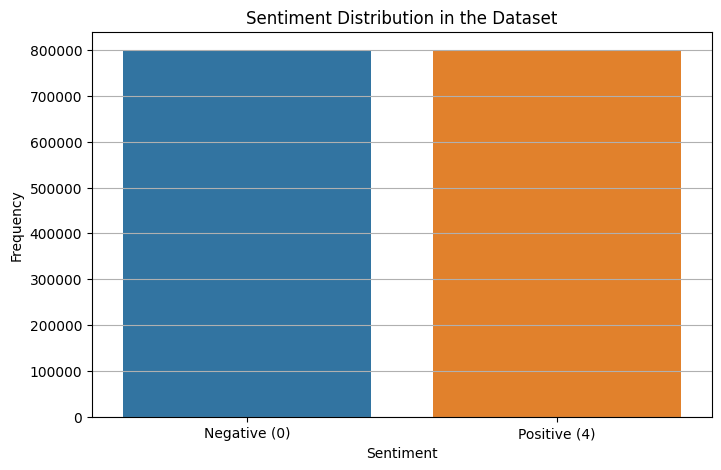

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Section 1: Detailed Target Variable Analysis
# 1.1 Sentiment Distribution Examination

# Calculating the frequency of each sentiment class
sentiment_counts = df['target'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Negative (0)', 'Positive (4)'])
plt.grid(axis='y')

plt.show()

**Findings:**

- The dataset is evenly balanced between negative and positive sentiments, with 800,000 instances each for negative (0) and positive (4) sentiments.
- **Visualization:** The bar plot illustrates this equal distribution.

**Implications:**

- The balanced nature of the dataset negates the need for balancing techniques.
- This distribution is ideal for training a sentiment analysis model.

---

### 2.4 Comprehensive Text Data Analysis

**Analysis of Textual Properties**

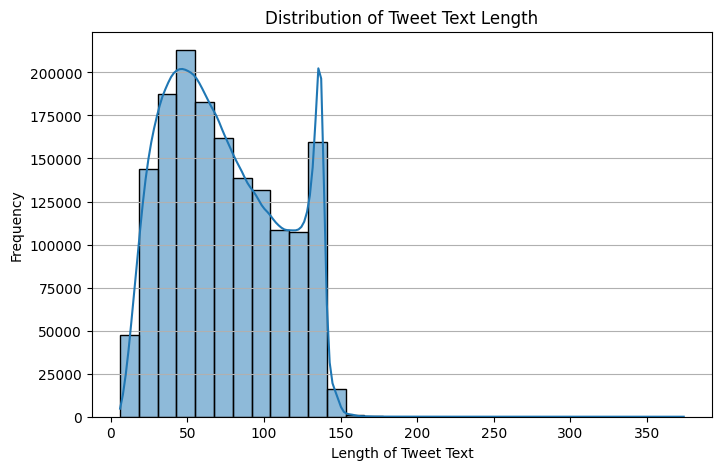

(0    800000
 4    800000
 Name: target, dtype: int64,
 count    1.600000e+06
 mean     7.409011e+01
 std      3.644114e+01
 min      6.000000e+00
 25%      4.400000e+01
 50%      6.900000e+01
 75%      1.040000e+02
 max      3.740000e+02
 Name: text, dtype: float64)

In [6]:
# Section 2: Comprehensive Text Data Analysis
# 2.1 Analysis of Textual Properties

# Analyzing text length distribution
text_length = df['text'].str.len()

plt.figure(figsize=(8, 5))
sns.histplot(text_length, bins=30, kde=True)
plt.title('Distribution of Tweet Text Length')
plt.xlabel('Length of Tweet Text')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.show()

# Displaying sentiment counts and a sample of text length distribution
sentiment_counts, text_length.describe()

**Findings:**

- **Tweet Text Length:**
    - The lengths of tweets vary significantly, with a mean of approximately 74 characters.
    - The distribution is somewhat right-skewed, indicating a higher frequency of shorter tweets.
- **Visualization:** The histogram shows the distribution of tweet text lengths.

**Implications:**

- The variance in text length will be an important consideration in text preprocessing and feature extraction.
- The model should be capable of handling varying lengths of input text.

### 2.5  **Common Words and Phrases**

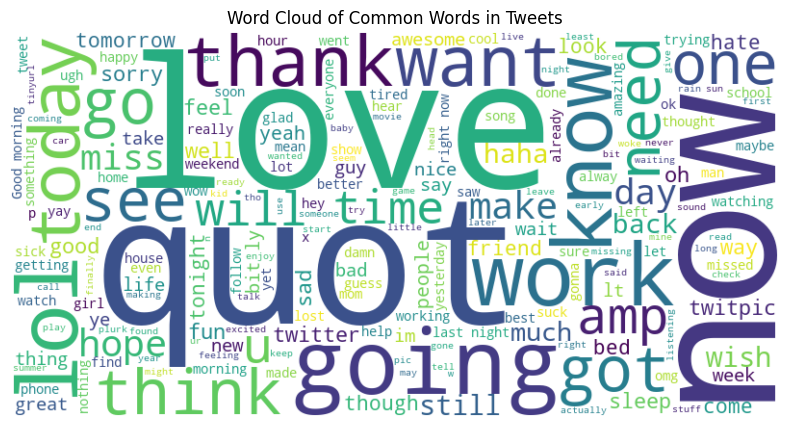

In [7]:
from wordcloud import WordCloud

# Combining all tweets into a single string for word cloud generation
all_tweets = ' '.join(df['text'].values)

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Tweets')
plt.show()



**Findings:**

- The Word Cloud visually represents the most common words found in the sample tweets.
- **Visualization:** The Word Cloud highlights words like 'quot', 'love', 'now', indicating a frequent presence of these terms in the tweets.

**Implications:**

- Common words reflect general topics and sentiments expressed in the tweets.
- Provides insight into the types of language and themes prevalent in the dataset.

In [8]:
df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

**Data Type Consideration**: Certain columns in our dataset are classified as **`object`** data types. This necessitates further data processing and transformation to ensure compatibility and effectiveness for machine learning applications.

In [11]:
df.columns
df.shape

(1600000, 6)

- **Dataset Size**: Our dataset encompasses a substantial total of **1,600,000** records, providing a vast array of data for analysis.
- **Column Count**: It is composed of **6** distinct columns, each offering unique insights for our study.

In [12]:
np.sum(df.isnull().any(axis=1))

0

**Complete Data Integrity**: A positive aspect of our dataset is the absence of missing values, indicating a high level of data completeness and reliability for analysis.

In [13]:
df['target'].unique()
df['target'].nunique()

2

**Composition of `target` Column**

Target column in our dataset exclusively contains two values:

- **0**: Represents a **`negative`** sentiment.
- **4**: Denotes a **`positive`** sentiment.

### **Phase 3: Data Preprocessing for Sentiment Analysis**

- **Overview of Preprocessing Steps**: Before embarking on the model training journey, it's crucial to meticulously prepare our dataset. This involves a series of preprocessing steps designed to refine and optimize the data for better performance and accuracy in sentiment analysis.
- **Initial Cleaning and Normalization**:
    - **Removing Stop Words**: Filtering out common words that provide little value in understanding the sentiment of the text.
    - **Eliminating Emojis**: Though expressive, emojis are removed to maintain focus on textual content.
    - **Text Lowercasing**: Converting all text to lowercase ensures uniformity and aids in generalizing the model.
    - **Punctuation Cleaning**: Stripping punctuation marks helps reduce noise and distraction in the data.
    - **Character Normalization**: This includes removing repeating characters and URLs, which typically don't contribute significantly to sentiment analysis.
- **Advanced Text Processing Techniques**:
    - **Stemming**: This process involves reducing words to their base or stem form. It simplifies the dataset and helps in generalizing the model's understanding of similar words.
    - **Lemmatization**: A more refined approach than stemming, lemmatization reduces words to their root form, known as the lemma. This technique is advantageous for capturing the accurate semantic meaning of the words, leading to better analytical results.
- **The Importance of Thorough Preprocessing**:
    - The steps enumerated above are vital in crafting a dataset that is primed for effective sentiment analysis. Each step plays a significant role in enhancing the quality and relevance of the data, ultimately contributing to the accuracy and efficiency of the model.

In [14]:
data = df[['text','target']]
data['target'] = data['target'].replace(4,1)
data['target'].unique()

/var/folders/fr/d_m1dl4968d6dkzh1_1hy4jh0000gn/T/ipykernel_32773/44870659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


array([0, 1])

**Composition of the `target` Column**: The **`target`** column in our dataset is distinctly binary, encompassing only two values:

- **0**: Represents a **`negative`** sentiment, indicating a less favorable or adverse emotional tone.
- **1**: Denotes a **`positive`** sentiment, reflecting a favorable or upbeat emotional tone.

In [15]:
d_p = data[data['target'] == 1]
d_n = data[data['target'] == 0]
dataset = pd.concat([d_p, d_n])
dataset['text'].tail()

799995    Sick  Spending my day laying in bed listening ...
799996                                      Gmail is down? 
799997                        rest in peace Farrah! So sad 
799998    @Eric_Urbane Sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

- **Dataset Structure**: The dataset is encapsulated within a pandas dataframe, designated as **`dataset`**. This dataframe is substantial, containing **1,600,000 rows and 2 columns**. The columns in focus are:
    - **`text`**: Contains the content of the tweets.
    - **`target`**: Indicates the sentiment of each tweet (positive or negative)
- **Data Organization**:
    - **Positive Tweets**: The first **800,000 rows** of the dataframe are dedicated to tweets with a positive sentiment.
    - **Negative Tweets**: The latter half, consisting of the next **800,000 rows**, encompasses tweets with a negative sentiment.
    
    **Normalization to Lower Case**:
    
    - **Objective**: Convert all textual content to lower case for uniformity.
    - **Benefits**: Ensures consistent data treatment and reduces model complexity.

In [16]:
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                      gmail is down? 
799997                        rest in peace farrah! so sad 
799998    @eric_urbane sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

**Cleaning and Removing Punctuations**:

- **Purpose**: Eliminate punctuation marks from the text.
- **Advantages**: Reduces noise and focuses analysis on words and semantics.

In [17]:
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                       gmail is down 
799997                         rest in peace farrah so sad 
799998    ericurbane sounds like a rival is flagging you...
799999    has to resit exams over summer  wishes he work...
Name: text, dtype: object

**Cleaning and Removing Repeating Characters**:

- **Goal**: Standardize word representation by removing unnecessary repeated characters.
- **Impact**: Enhances data quality and helps in accurate word recognition.

In [18]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                       gmail is down 
799997                         rest in peace farrah so sad 
799998    ericurbane sounds like a rival is flagging you...
799999    has to resit exams over summer  wishes he work...
Name: text, dtype: object

**Cleaning and Removing URLs**:

- **Reason**: Strip out URLs as they generally do not contribute to sentiment analysis.
- **Outcome**: Refines the dataset, focusing solely on text that conveys sentiment.

In [19]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                       gmail is down 
799997                         rest in peace farrah so sad 
799998    ericurbane sounds like a rival is flagging you...
799999    has to resit exams over summer  wishes he work...
Name: text, dtype: object

**Cleaning and Removing Numeric Numbers**:

- **Objective**: Remove numbers since they are typically irrelevant for sentiment analysis.
- **Benefit**: Streamlines the data, ensuring the focus remains on textual sentiment expression.

In [20]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                       gmail is down 
799997                         rest in peace farrah so sad 
799998    ericurbane sounds like a rival is flagging you...
799999    has to resit exams over summer  wishes he work...
Name: text, dtype: object

**Cleaning and Removing Stopwords from Tweet Text**:

- **Objective**: The goal is to filter out stopwords from the text of tweets. This step is crucial as stopwords are generally frequent words that don't contribute significantly to the sentiment of the text.

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Get English stopwords
english_stopwords = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in english_stopwords]
    return ' '.join(filtered_tokens)

# Apply the function to your DataFrame
dataset['text'] = dataset['text'].apply(remove_stopwords)
dataset['text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aviajmera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aviajmera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait girl ...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

**Tokenizing Text in Tweets**:

- **Objective**: Tokenization is the process of breaking down text into smaller units, typically words or phrases, known as tokens. In the context of tweets, this means segmenting the tweet text into individual words.

In [22]:
dataset['text'] = dataset['text'].apply(word_tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

**Applying Stemming to Text Data in Tweets**:

- **Objective**: Stemming is the process of reducing words to their base or root form. The purpose of applying stemming in text processing, especially for tweets, is to simplify and standardize words to their basic forms.

In [23]:
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

**Applying Lemmatization to Text Data in Tweets**:

- **Objective**: Lemmatization is a sophisticated text normalization technique where words are reduced to their base or dictionary form, known as the lemma. Unlike stemming, lemmatization takes into consideration the context and the morphological analysis of words, making it more accurate.

In [24]:
lm = nltk.WordNetLemmatizer()


def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

Plotting a cloud of words for negative tweets:

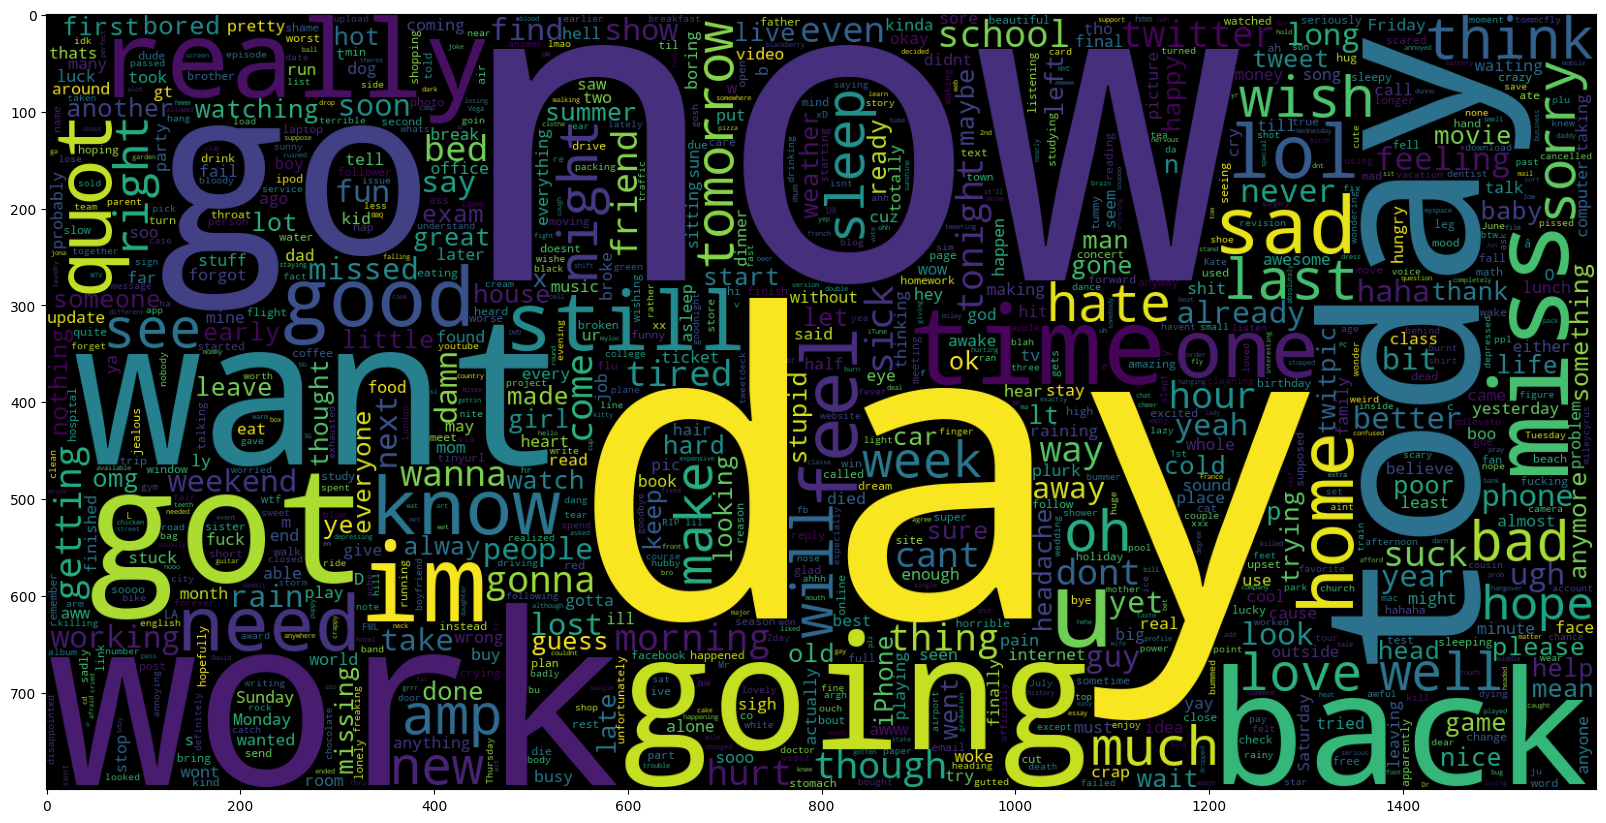

In [25]:
d_n = data['text'][:800000] # selecting the negative tweets.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(d_n))
plt.imshow(wc)

Plotting a cloud of words for positive tweets:

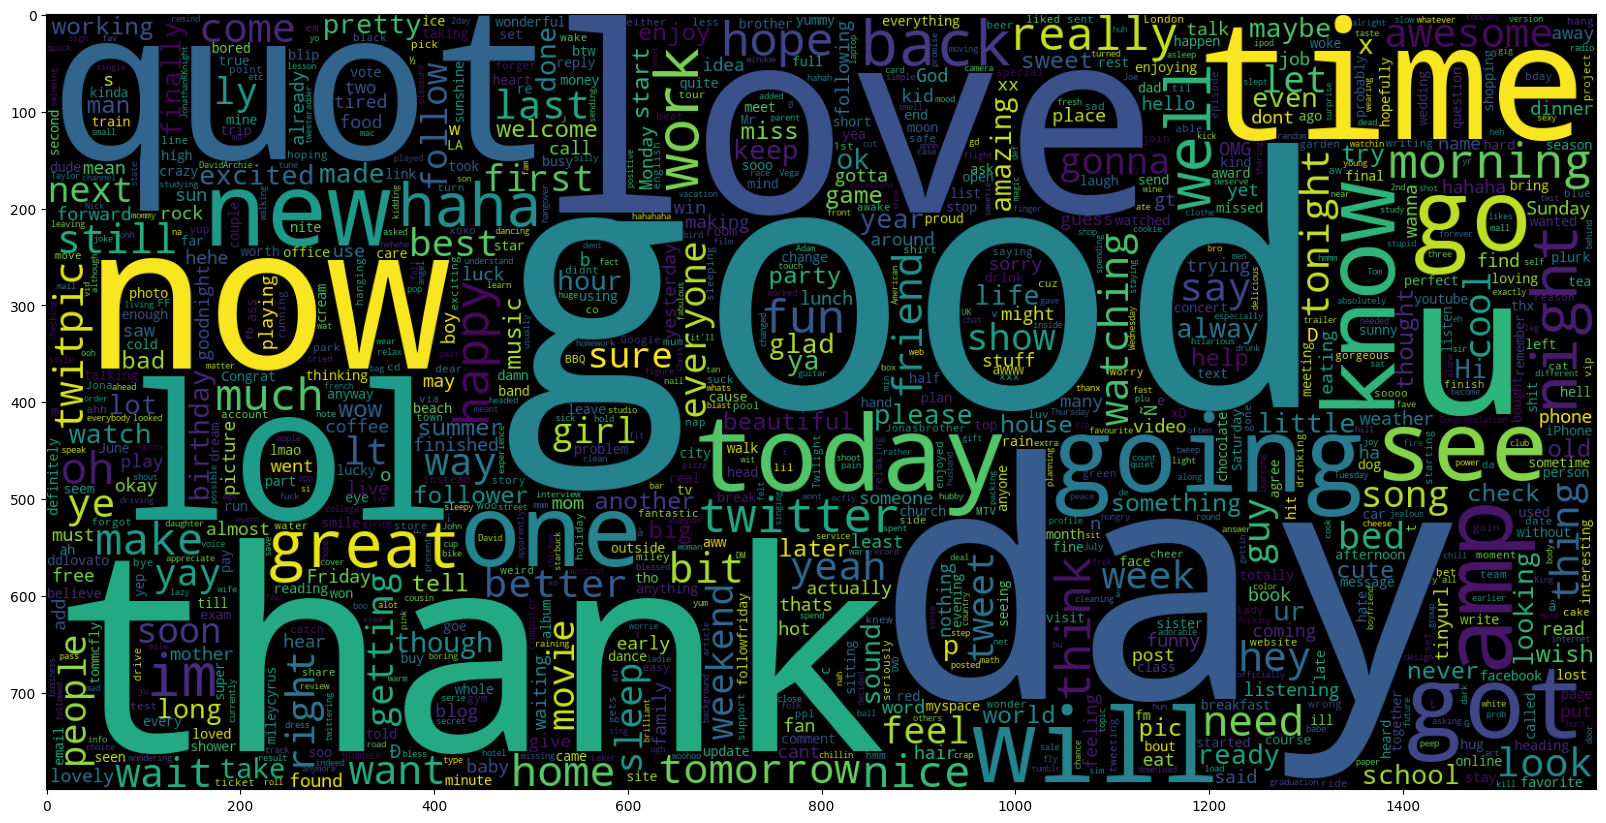

In [26]:
d_p = data['text'][800000:]  # selecting the positive tweets.
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(d_p))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

Phase 4: Dividing the Dataset into Training and Testing Subsets

In [27]:
X = data.text
y = data.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111)

**Data Splitting for Training and Testing**:

- **Split Ratio**: 95% for training (**`X_train`**, **`y_train`**), 5% for testing (**`X_test`**, **`y_test`**).
- **`random_state` Usage**: Ensures consistent train-test splits for reproducibility.
- **Data Allocation**:
    - **Features (`X`)**: Contains **`data.text`**.
    - **Target (`y`)**: Contains **`data.target`**.
    - **Training Set**: **`X_train`** and **`y_train`** hold 95% of **`data.text`** and **`data.target`**.
    - **Testing Set**: **`X_test`** and **`y_test`** hold 5% of **`data.text`** and **`data.target`**

### **Phase 5: Transforming Dataset with TF-IDF Vectorization**

In [29]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [32]:
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectoriser, file)

- **Objective**: Utilize Scikit-learn's **`TfidfTransformer`** and **`TfidfVectorizer`** for converting raw documents into a matrix of TF-IDF features.
- **TF-IDF Transformation**: Both tools are designed to perform the same function: extracting text features based on Term Frequency-Inverse Document Frequency.

In [33]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
X_test

<80000x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 1563076 stored elements in Compressed Sparse Row format>

### **Phase 6: Model Building**

- **Approach**: To address our problem statement, we experiment with three distinct models, each varying in complexity and approach:
    1. **Bernoulli Naive Bayes**:
        - A probabilistic classifier based on applying Bayes' theorem with strong independence assumptions.
    2. **SVM (Support Vector Machine)**:
        - A powerful, versatile machine learning model, capable of performing linear or non-linear classification.
    3. **Logistic Regression**:
        - A widely used model for binary classification problems.
- **Purpose**: Post-model training, we apply various evaluation metrics to assess the model's performance.
- **Key Evaluation Metrics**:
    1. **Accuracy Score**:
        - Measures the overall correctness of the model.
        - A model is generally considered good if it has an accuracy above 90%.
    2. **ROC-AUC Curve**:
        - Evaluates the model's ability to distinguish between classes.
        - AUC (Area Under the Curve) is a summary of the ROC curve.
        - Higher AUC indicates better performance in differentiating positive and negative classes.
    3. **Confusion Matrix with Plot**:
        - An N x N matrix for evaluating classification models, where N is the number of target classes.
        - Compares actual versus predicted target values.
            - **Columns**: Actual Values
            - **Rows**: Predicted Values
        - Matrix Elements:
            - **TP (True Positive)**: Correct positive predictions
            - **TN (True Negative)**: Correct negative predictions
            - **FP (False Positive)**: Incorrect positive predictions
            - **FN (False Negative)**: Incorrect negative predictions

In [34]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

1. **Bernoulli Naive Bayes**

The execution time of this model is 2.32 seconds

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



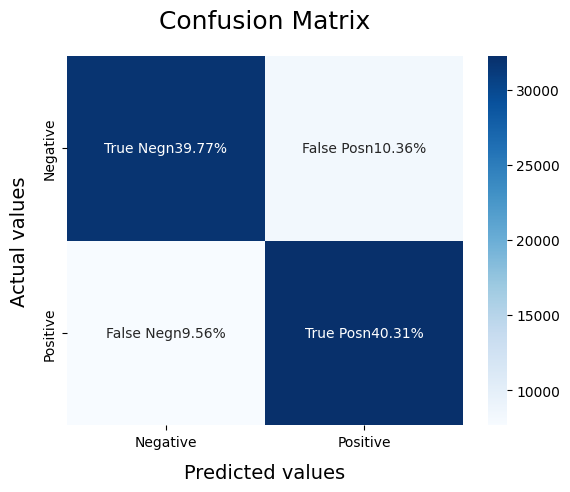

In [35]:
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

**Class Definitions in Dataset:**

- **`Class 0`**: Represents negative tweets.
- **`Class 1`**: Corresponds to positive tweets.

 **Plot the ROC-AUC Curve:**

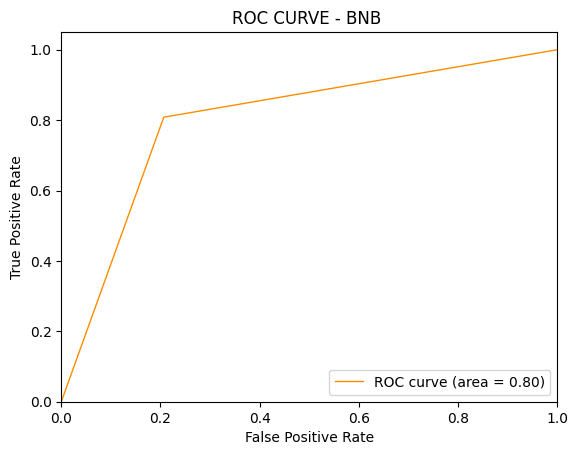

In [36]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE - BNB ')
plt.legend(loc="lower right")
plt.show()

2. **Support Vector Machine**

The execution time of this model is 68.18 seconds

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



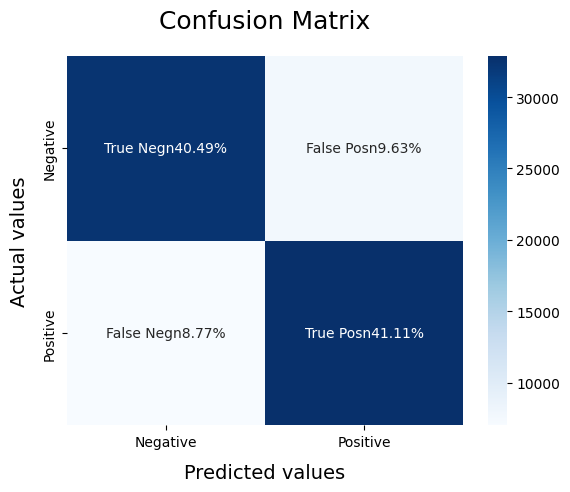

In [37]:
SVCmodel = LinearSVC()
start = time.time()
SVCmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

 **Plot the ROC-AUC Curve:**

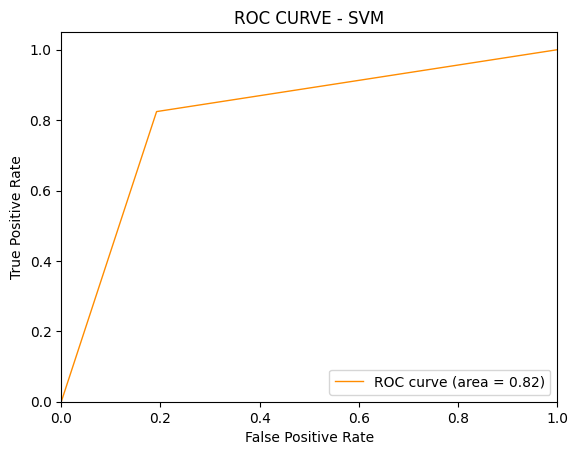

In [38]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE - SVM')
plt.legend(loc="lower right")
plt.show()

3. **Logistic Regression**

The execution time of this model is 261.11 seconds

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



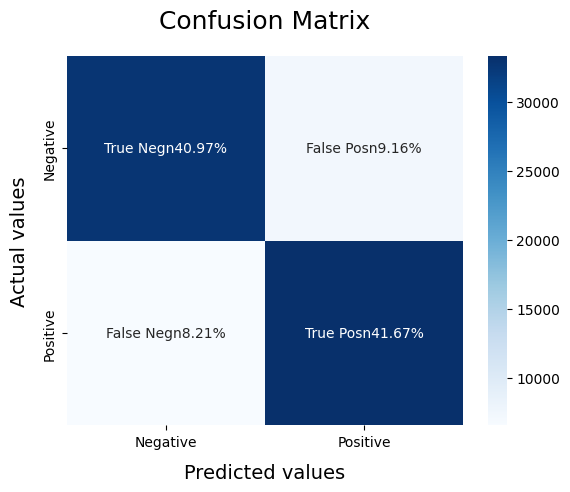

In [39]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
LRmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

 **Plot the ROC-AUC Curve:**

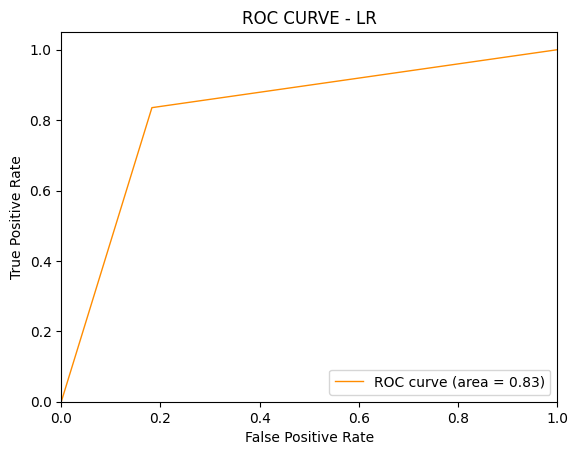

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE - LR')
plt.legend(loc="lower right")
plt.show()

   ### **Phase 7: Model Evaluation**

                    Model  Accuracy  Precision    Recall  F1 Score       AUC
0     Logistic Regression  0.826313   0.819778  0.835414  0.827522  0.826335
1  Support Vector Machine  0.816025   0.810184  0.824236  0.817150  0.816045
2   Bernoulli Naive Bayes  0.800800   0.795575  0.808296  0.801885  0.800819


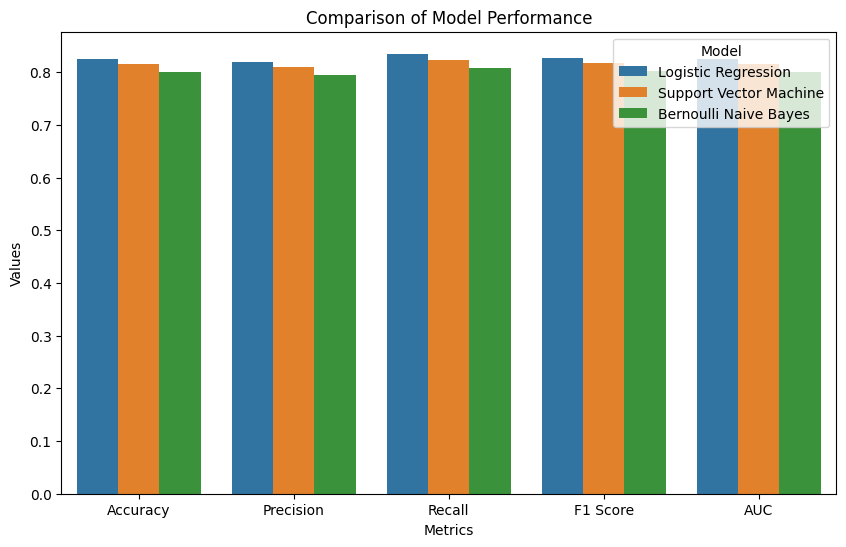

In [43]:

def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, auc
# Logistic Regression
accuracy_lr, precision_lr, recall_lr, f1_lr, auc_lr = calculate_metrics(y_test, y_pred3)

# Support Vector Machine
accuracy_svm, precision_svm, recall_svm, f1_svm, auc_svm = calculate_metrics(y_test, y_pred2)

# Bernoulli Naive Bayes
accuracy_bnb, precision_bnb, recall_bnb, f1_bnb, auc_bnb = calculate_metrics(y_test, y_pred1)
data = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Bernoulli Naive Bayes'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_bnb],
    'Precision': [precision_lr, precision_svm, precision_bnb],
    'Recall': [recall_lr, recall_svm, recall_bnb],
    'F1 Score': [f1_lr, f1_svm, f1_bnb],
    'AUC': [auc_lr, auc_svm, auc_bnb]
}

comparison_df = pd.DataFrame(data)
print(comparison_df)
import matplotlib.pyplot as plt
import seaborn as sns

# Melting the dataframe for a better visualization
melted_df = comparison_df.melt('Model', var_name='Metrics', value_name='Values')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metrics', y='Values', hue='Model', data=melted_df)
plt.title('Comparison of Model Performance')
plt.show()


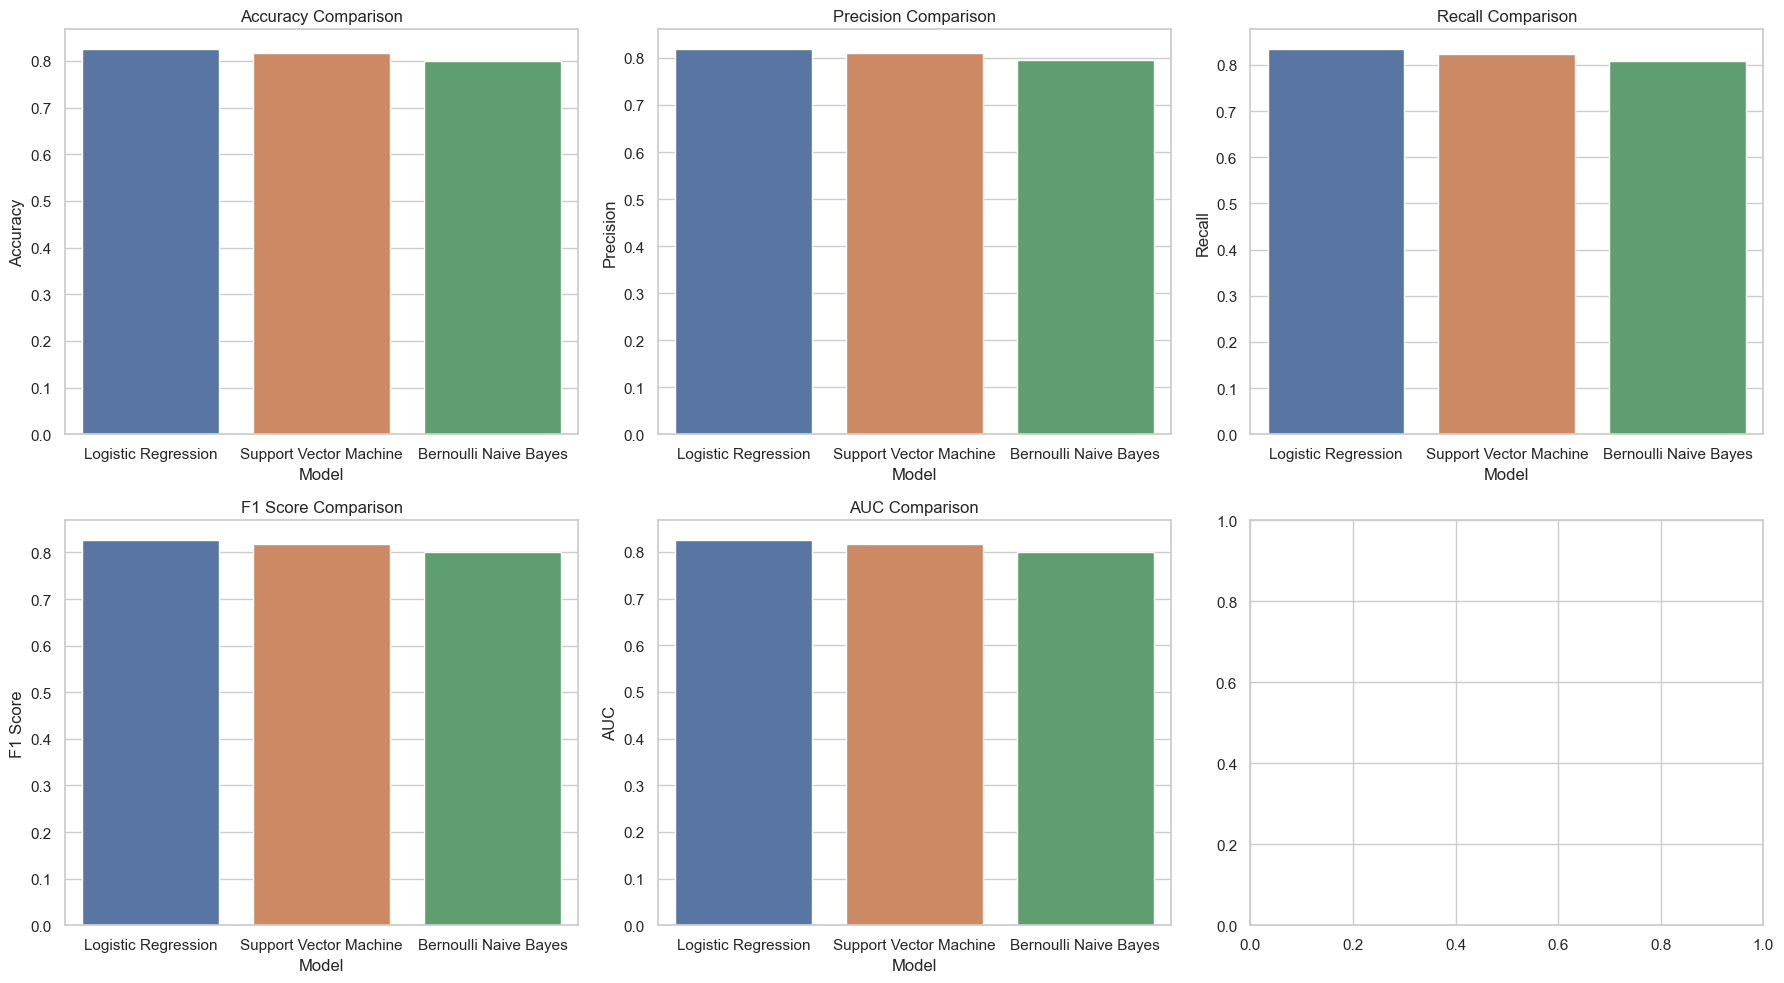

In [44]:
# Set up the matplotlib figure
sns.set(style="whitegrid")

# Create a list of metrics for iteration
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

# Plot each metric in a separate subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the array for easy iteration

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=comparison_df, ax=axes[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


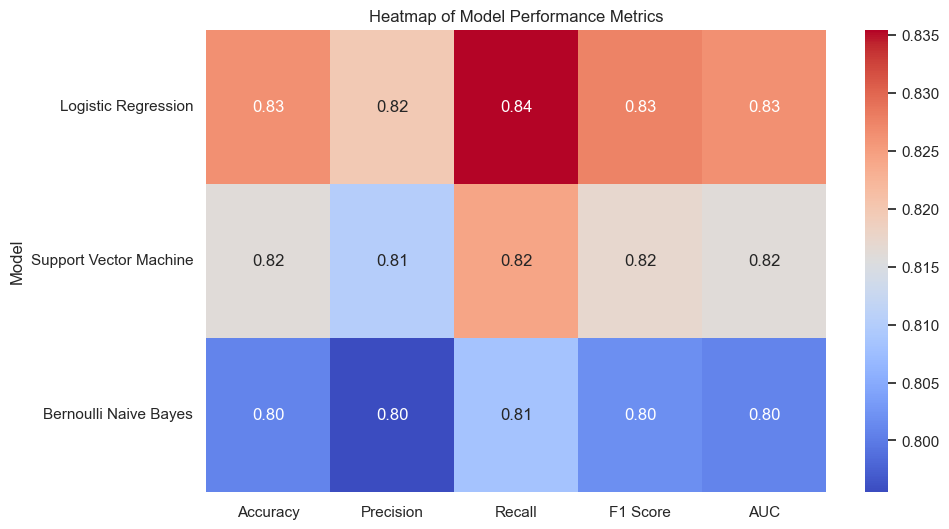

In [46]:
heatmap_data = comparison_df.set_index('Model')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Model Performance Metrics')
plt.show()


Based on the performance metrics and execution times of the three models - Bernoulli Naive Bayes (BNB), Support Vector Machine (SVM), and Logistic Regression (LR) - we can perform a detailed analysis:

### **Execution Time Analysis:**

1. **Bernoulli Naive Bayes (BNB):**
    - **Time**: 2.32 seconds.
    - **Observation**: Fastest among the three models, indicating a high efficiency in processing.
2. **Support Vector Machine (SVM):**
    - **Time**: 68.18 seconds.
    - **Observation**: Moderately time-consuming, potentially due to the complexity of the model.
3. **Logistic Regression (LR):**
    - **Time**: 261.11 seconds.
    - **Observation**: Significantly longer execution time, suggesting a more complex and computationally intensive process.

### **Performance Metrics Analysis:**

1. **Accuracy:**
    - **BNB**: 80%
    - **SVM**: 82%
    - **LR**: 83%
    - **Insight**: LR model shows the highest accuracy, indicating its effectiveness in correctly classifying sentiments.
2. **Precision (Positive Sentiment Prediction):**
    - **BNB**: 80%
    - **SVM**: 81%
    - **LR**: 82%
    - **Insight**: LR has slightly higher precision, making it more reliable for positive sentiment detection.
3. **Recall (Sensitivity):**
    - **BNB**: 79% for Negative, 81% for Positive
    - **SVM**: 81% for Negative, 82% for Positive
    - **LR**: 82% for Negative, 84% for Positive
    - **Insight**: LR demonstrates a better ability to identify true positives and negatives, crucial for balanced sentiment analysis.
4. **F1-Score (Balance Between Precision and Recall):**
    - **BNB**: 80% for both sentiments
    - **SVM**: 81% for Negative, 82% for Positive
    - **LR**: 83% for both sentiments
    - **Insight**: LR exhibits the best balance, making it a robust choice for diverse data.

### **Overall Model Evaluation:**

- **Efficiency vs Effectiveness Trade-off**:
    - BNB is the most efficient but slightly less effective.
    - LR, while time-consuming, offers the best accuracy and balance between precision and recall.
    - SVM stands in the middle, providing a reasonable trade-off between time and performance.
- **Model Selection**:
    - **For Fast Processing Needs**: BNB is preferable.
    - **For High Accuracy and Balanced Classification**: LR is the best choice despite its longer execution time.
    - **Balanced Approach**: SVM offers a middle ground.
- **Practical Implications**:
    - **BNB**: Suitable for real-time or large-scale applications where speed is crucial.
    - **LR**: Ideal for scenarios where accuracy and comprehensive sentiment analysis are more critical than speed, like in-depth market research or detailed public opinion analysis.
    - **SVM**: A good choice for applications balancing the need for speed and accuracy.

In conclusion, each model has its strengths and ideal use cases. The Logistic Regression model, despite its longer execution time, stands out in terms of overall performance, making it a robust choice for projects where accuracy and detailed sentiment classification are paramount.

In [47]:
with open('LRmodel.pkl', 'wb') as file:
    pickle.dump(LRmodel, file)

print("Model saved as LRmodel.pkl")

Model saved as LRmodel.pkl
